<a href="https://colab.research.google.com/github/fcignoli/Redes-Complejas-2-20222/blob/main/TPC01_ConceptosB%C3%A1sicos_Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
import random

from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
%%shell
# Cambiar URL por la dirección correcta
URL=http://materias.df.uba.ar/rca2022c2/files/2022/08/dolphinsGender.zip
FILE="${URL##*/}"

# Elimina una carpeta preincluida en Colab.
if [ -e "sample_data" ]; then rm -r sample_data; fi
# Si no existe ya el archivo, lo baja y lo descomprime.
if [ ! -e $FILE ]; then wget --quiet $URL; unzip -qq $FILE; fi
ls

dolphinsGender.txt  dolphins.gml  yeast_AP-MS.txt  yeast_Y2H.txt
dolphinsGender.zip  dolphins.txt  yeast_LIT.txt


In [ ]:
def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    return data

delfines = nx.read_gml("/content/dolphins.gml")
dolphinsGender = abrir_txt("/content/dolphinsGender.txt")

In [ ]:
nombres_delfines=[] #  quedemosnos solamente con los nombres
for i in np.arange(0,len(dolphinsGender),1):
  nombre_aux=dolphinsGender[i][0]
  nombres_delfines= np.append((nombres_delfines),(nombre_aux))

sexo_delfines=[] #  quedemosnos solamente con los sexos
for i in np.arange(0,len(dolphinsGender),1):
  sexo_aux=dolphinsGender[i][1]
  sexo_delfines= np.append((sexo_delfines),(sexo_aux))

#convirtamos cada sexo en un color
colores=[]
for i in np.arange(0,len(sexo_delfines),1):
  if sexo_delfines[i]=='f':
    color='red'
  elif sexo_delfines[i]=='m':
    color='blue'
  else:
    color='black'
  colores=np.append((colores),(color))

#2) Considere la red social de 62 delfines de Nueva Zelanda (dolphins.txt).


#a) Examine diferentes opciones de layout para este grafo e identifique la que le resulte más informativa. Justifique su elección detallando las características estructurales de la red que su elección pone en evidencia. Incluya en la representación gráfica de la red información sobre el sexo de los delfines.

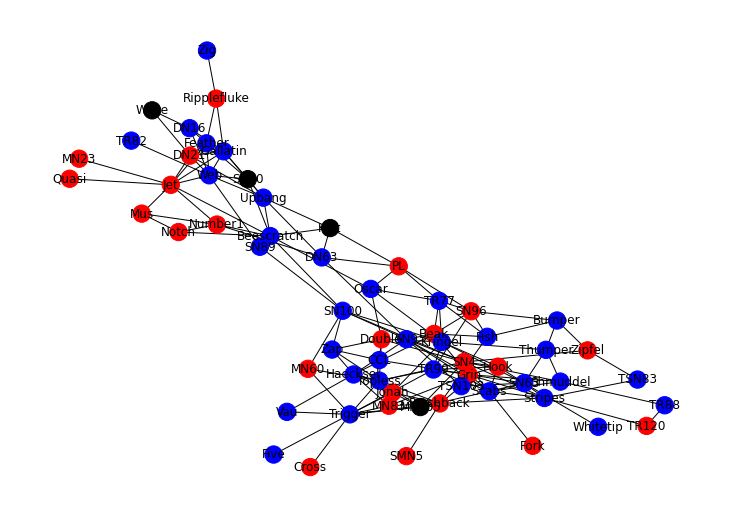

In [ ]:
#graficamos tal cual vino
plt.figure(figsize=(10,7))
nx.draw(delfines, with_labels=True, node_color=colores)
# grafico la red, 'with_labels' es para ver los nombres de los nodos
plt.show()

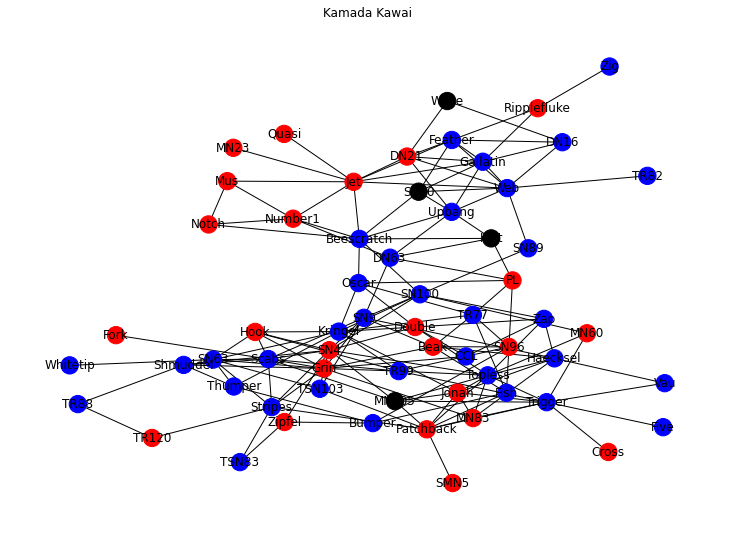

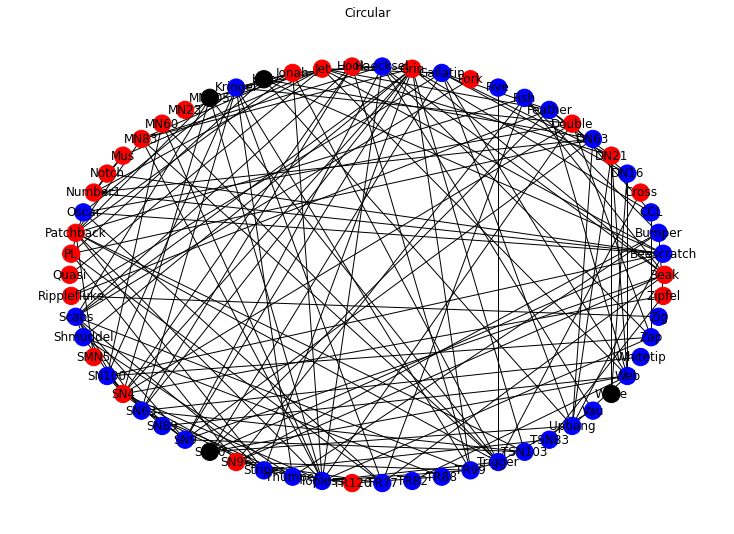

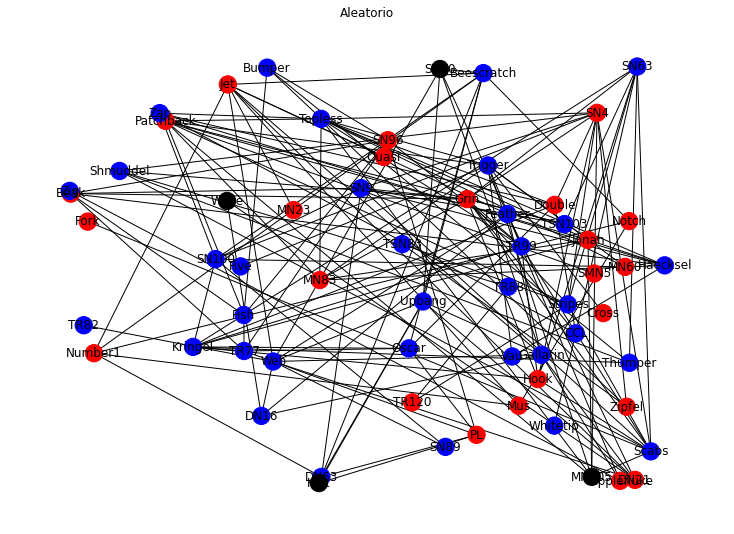

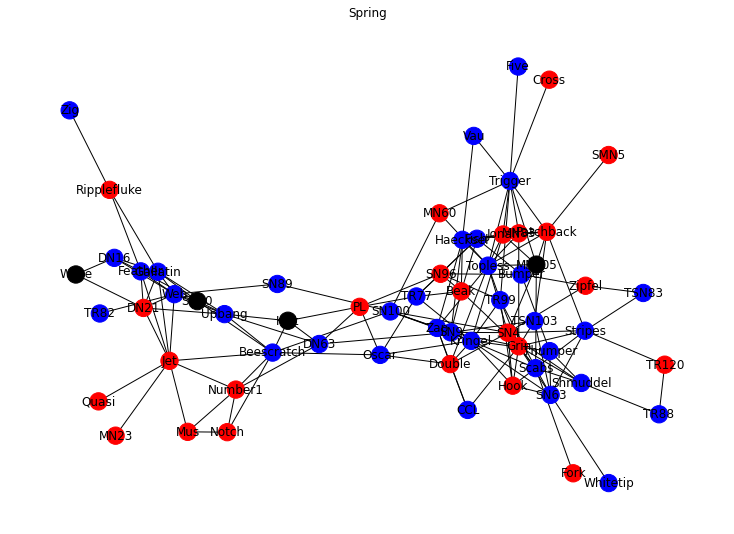

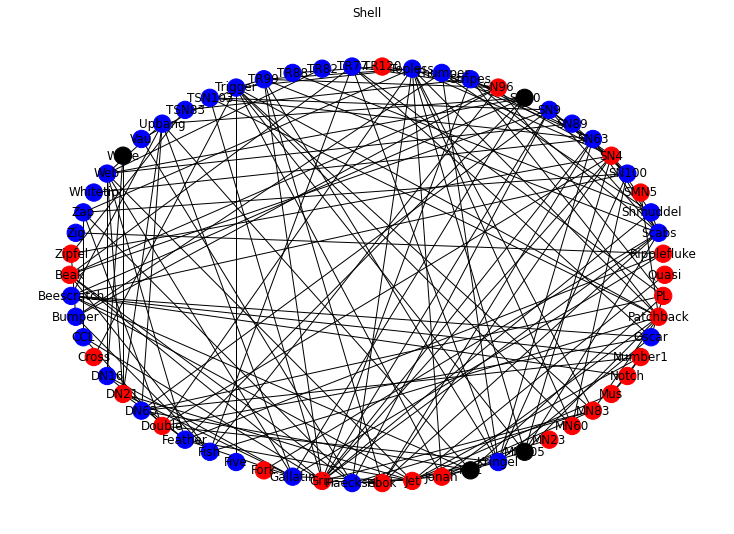

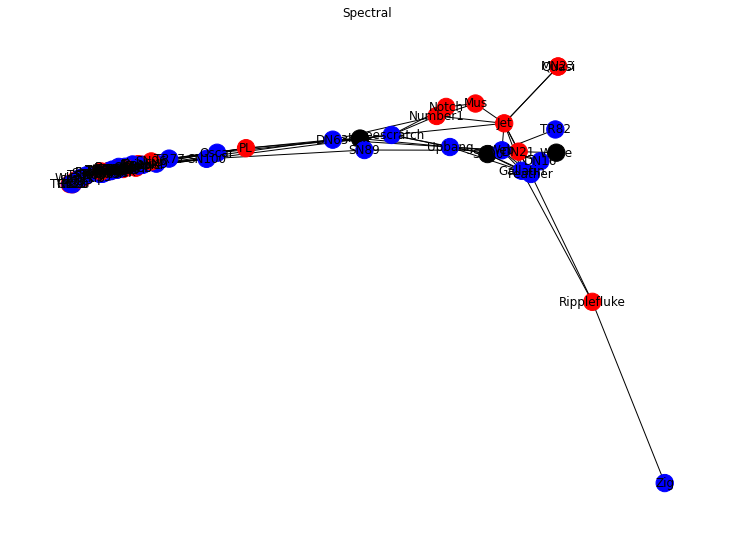

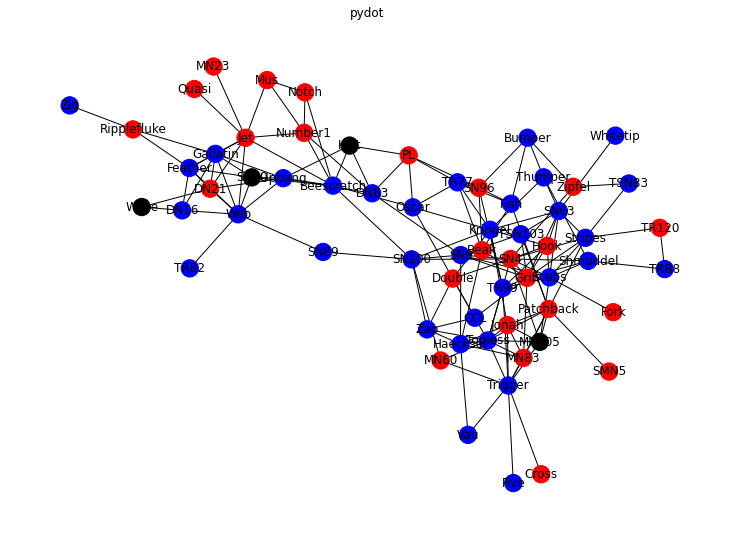

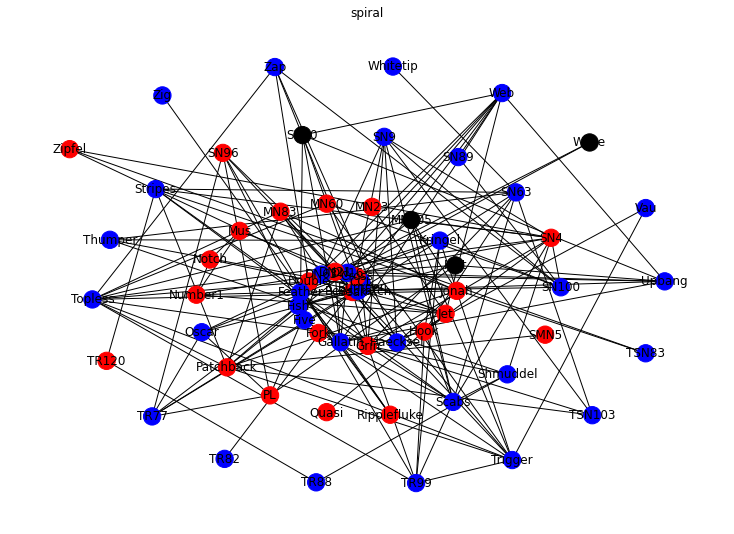

In [ ]:
#Veamos varios layouts

plt.figure(figsize=(10,7))
nx.draw_kamada_kawai(delfines, with_labels=True, node_color=colores)
plt.title('Kamada Kawai')
plt.show()
plt.figure(figsize=(10,7))
nx.draw_circular(delfines, with_labels=True, node_color=colores)
plt.title('Circular')
plt.show()
plt.figure(figsize=(10,7))
nx.draw_random(delfines, with_labels=True, node_color=colores)
plt.title('Aleatorio')
plt.show()
plt.figure(figsize=(10,7))
nx.draw_spring(delfines, with_labels=True, node_color=colores)
plt.title('Spring')
plt.show()
plt.figure(figsize=(10,7))
nx.draw_shell(delfines, with_labels=True, node_color=colores)
plt.title('Shell')
plt.show()

plt.figure(figsize=(10,7))
nx.draw_spectral(delfines, with_labels=True, node_color=colores)
plt.title('Spectral')
plt.show()

plt.figure(figsize=(10,7))
pos = nx.nx_pydot.pydot_layout(delfines, prog='fdp')
nx.draw(delfines, pos=pos , with_labels=True, node_color=colores)
plt.title('pydot')
plt.show()

plt.figure(figsize=(10,7))
pos_1 = nx.spiral_layout(delfines)
nx.draw(delfines, pos=pos_1 , with_labels=True, node_color=colores)
plt.title('spiral')
plt.show()

Podemos observar que hay dos "nubes de puntos" bastante diferenciables a simple vista. Se ve en pydot, spectral, spring y kamada-kawai. Donde mejor se aprecia es en spring y pydot, por lo que estas son los que mejor muestran este aspecto. Los layouts que imponen una forma fija a los nodos, como puede ser circular o spiral, no son convenientes ya que ocultan esta caracteristica del grafo. 

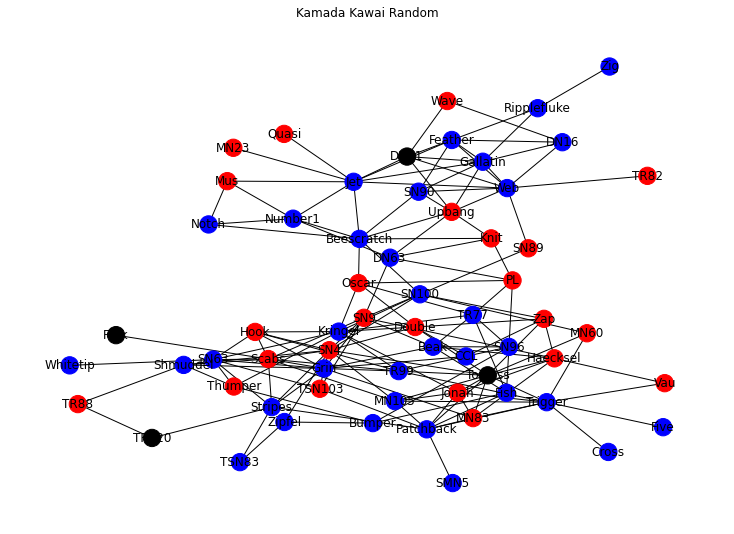

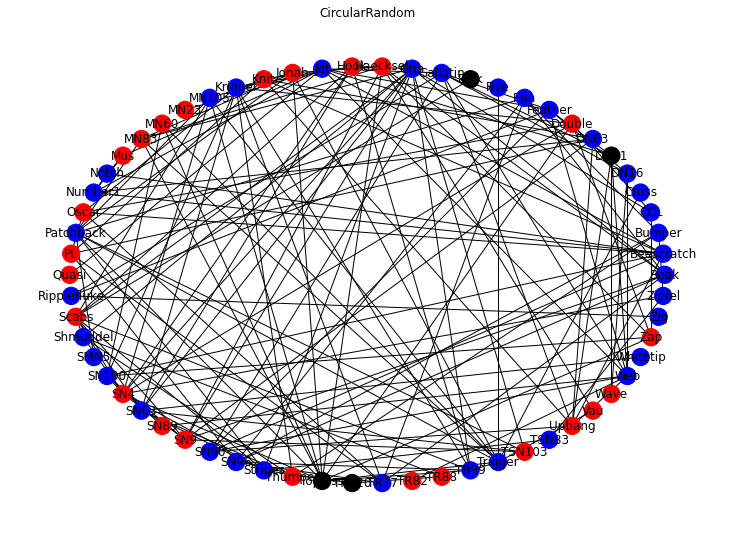

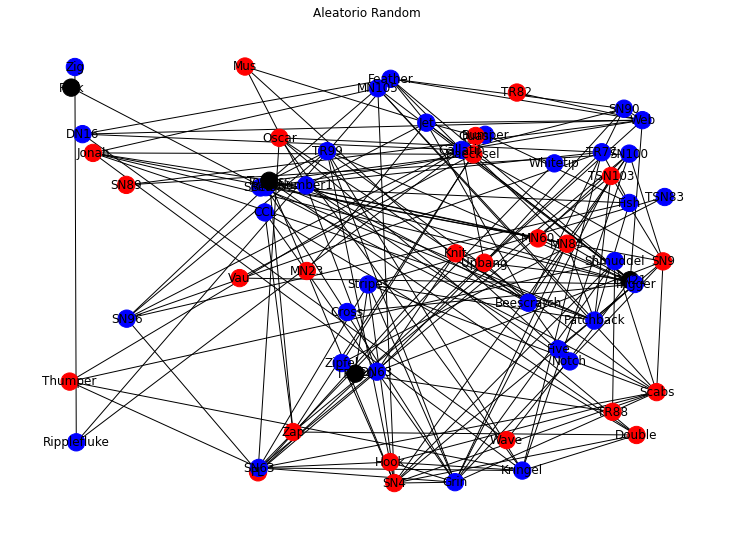

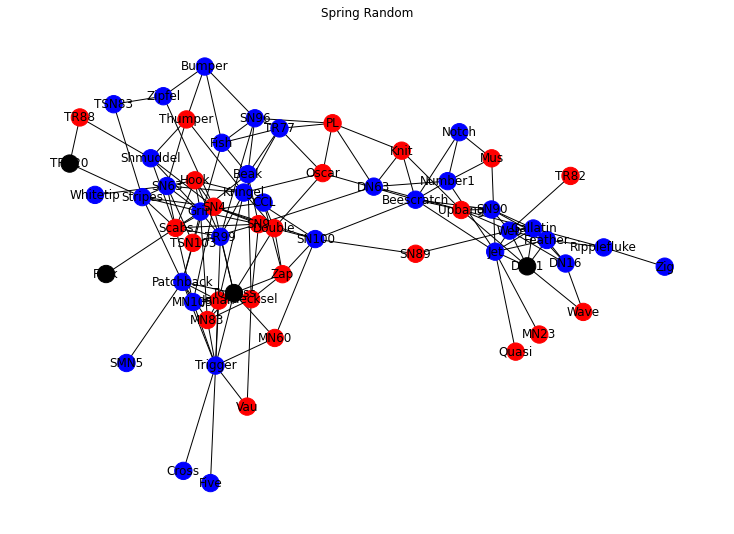

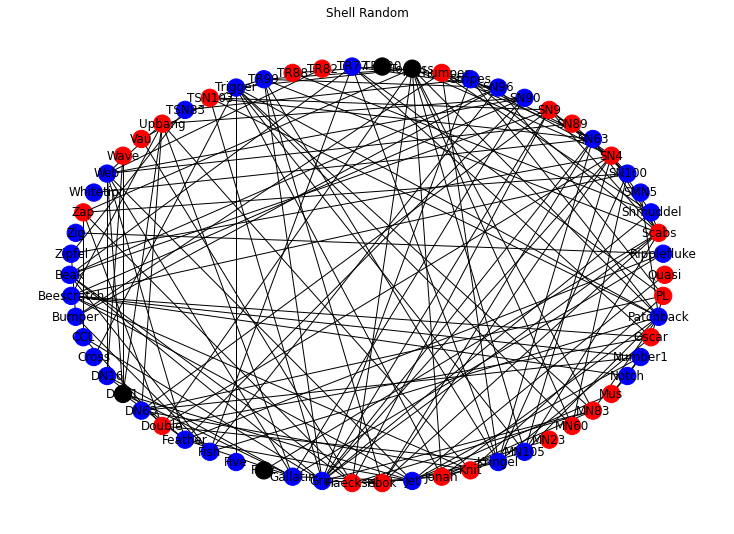

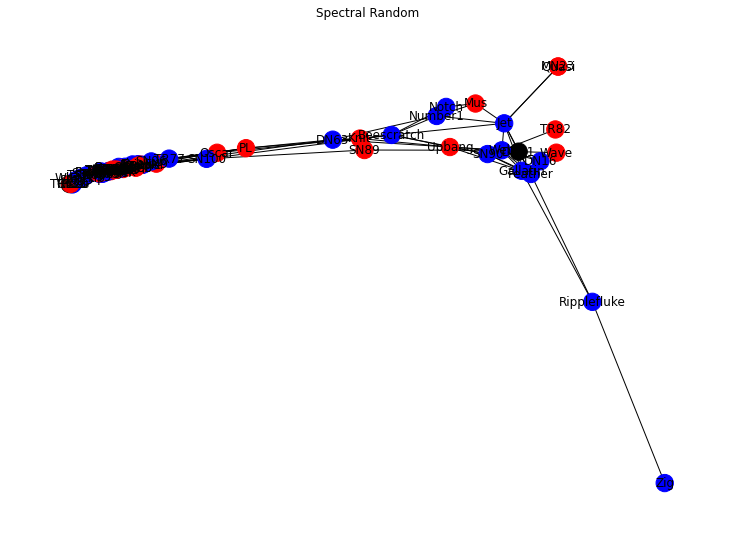

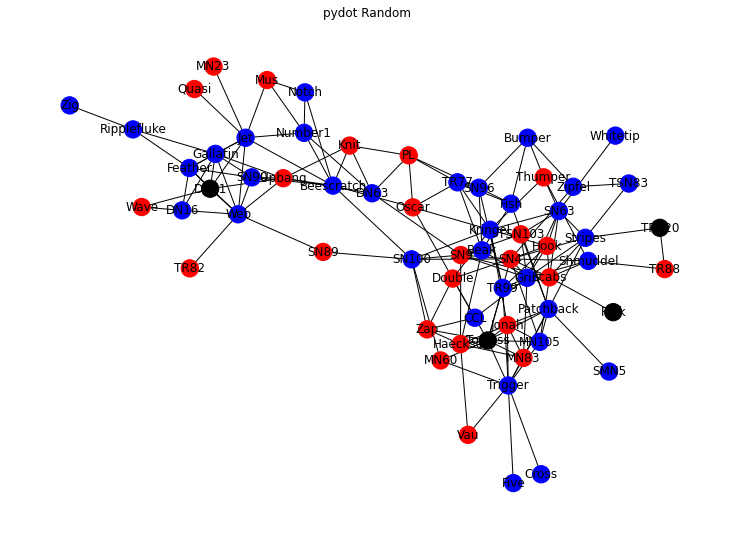

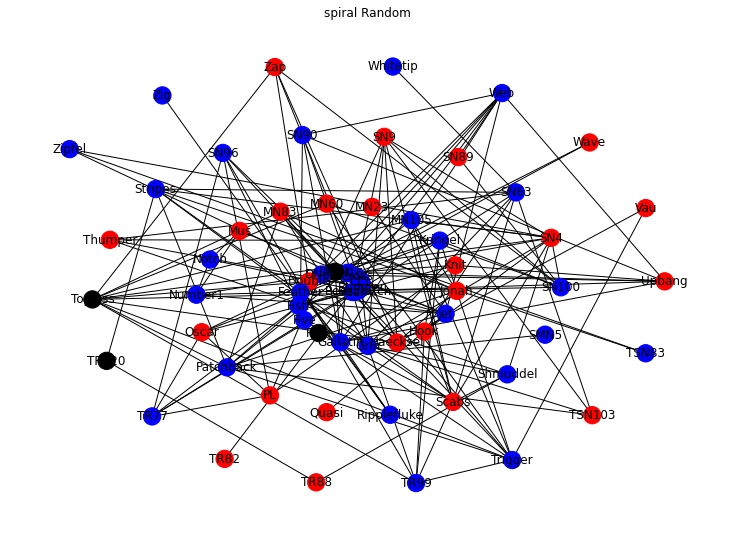

In [ ]:
#Aleatoricemos el género, para ver como responden las visualizaciones

#veamos esta proporción si aletorizamos los géneros
sexo_delfines_cambiado= sorted(sexo_delfines, key=lambda k: random.random())

colores_cambiados=[]
for i in np.arange(0,len(sexo_delfines_cambiado),1):
  if sexo_delfines_cambiado[i]=='f':
    color='red'
  elif sexo_delfines_cambiado[i]=='m':
    color='blue'
  else:
    color='black'
  colores_cambiados=np.append((colores_cambiados),(color))

#veamos como queda

plt.figure(figsize=(10,7))
nx.draw_kamada_kawai(delfines, with_labels=True, node_color=colores_cambiados)
plt.title('Kamada Kawai Random')
plt.show()
plt.figure(figsize=(10,7))
nx.draw_circular(delfines, with_labels=True, node_color=colores_cambiados)
plt.title('CircularRandom')
plt.show()
plt.figure(figsize=(10,7))
nx.draw_random(delfines, with_labels=True, node_color=colores_cambiados)
plt.title('Aleatorio Random')
plt.show()
plt.figure(figsize=(10,7))
nx.draw_spring(delfines, with_labels=True, node_color=colores_cambiados)
plt.title('Spring Random')
plt.show()
plt.figure(figsize=(10,7))
nx.draw_shell(delfines, with_labels=True, node_color=colores_cambiados)
plt.title('Shell Random')
plt.show()
plt.figure(figsize=(10,7))
nx.draw_spectral(delfines, with_labels=True, node_color=colores_cambiados)
plt.title('Spectral Random')
plt.show()

plt.figure(figsize=(10,7))
pos = nx.nx_pydot.pydot_layout(delfines, prog='fdp')
nx.draw(delfines, pos=pos , with_labels=True, node_color=colores_cambiados)
plt.title('pydot Random')
plt.show()

plt.figure(figsize=(10,7))
pos_1 = nx.spiral_layout(delfines)
nx.draw(delfines, pos=pos_1 , with_labels=True, node_color=colores_cambiados)
plt.title('spiral Random')
plt.show()

No observamos cambios en la estructura antes mencionada al aleatorizar los generos, por lo que no podemos afirmar que el genero juegue un rol relevante en esta estructura basica de vinculos entre nodos de la red.

#b. ¿Se trata una red donde prevalece la homofilia en la variable género? Para responder:

# i. Considere la distribución nula para la fracción de enlaces que vinculan géneros diferentes, generada a partir de al menos 1000 asignaciones aleatorias de género.

In [ ]:
#agregemos el sexo como atributo de la red
for i in np.arange(0,len(sexo_delfines),1):
  delfines.add_node(dolphinsGender[i][0], sexo = dolphinsGender[i][1])
  
cuenta_machos=0
cuenta_hembras=0
cuenta_no=0
lista=list(delfines.edges.data())

for i in np.arange(0,len(lista),1):
  sexo_del_nodo_a = delfines.nodes.data()[lista[i][0]]
  sexo_del_nodo_b = delfines.nodes.data()[lista[i][1]]
  if sexo_del_nodo_a==sexo_del_nodo_b:
    if sexo_del_nodo_a=={'sexo': 'f'}:
        cuenta_hembras=cuenta_hembras+1
    elif sexo_del_nodo_a=={'sexo': 'm'}:
        cuenta_machos=cuenta_machos+1
  else:
      cuenta_no = cuenta_no +1

print('Los enlaces macho+macho son', cuenta_machos)
print('Los enlaces hembra+hembra son', cuenta_hembras)
print('Los enlaces entre distintos sexos son', cuenta_no)
print('Los enlaces totales son', len(lista))

print('Los enlaces macho+macho sobre el total son', cuenta_machos/len(lista))
print('Los enlaces hembra+hembra sobre el total son ', cuenta_hembras/len(lista))
print('Los enlaces entre distintos generos sobre el total son ', cuenta_no/len(lista))


Los enlaces macho+macho son 60
Los enlaces hembra+hembra son 36
Los enlaces entre distintos sexos son 63
Los enlaces totales son 159
Los enlaces macho+macho sobre el total son 0.37735849056603776
Los enlaces hembra+hembra sobre el total son  0.22641509433962265
Los enlaces entre distintos generos sobre el total son  0.39622641509433965


In [ ]:
#veamos esta proporcion si aletorizamos los géneros, lo vuelvo a hacer como antes
sexo_delfines_cambiado= sorted(sexo_delfines, key=lambda k: random.random())
#agregemos a la red el sexo cambiado
delfines_cambiado= delfines
for i in np.arange(0,len(sexo_delfines),1):
  delfines_cambiado.add_node(dolphinsGender[i][0], sexo = sexo_delfines_cambiado[i])
cuenta_machos_cambiado=0
cuenta_hembras_cambiado=0
cuenta_no_cambiado=0
lista=list(delfines_cambiado.edges.data())

for i in np.arange(0,len(lista),1):
  sexo_del_nodo_a = delfines_cambiado.nodes.data()[lista[i][0]]
  sexo_del_nodo_b = delfines_cambiado.nodes.data()[lista[i][1]]
  if sexo_del_nodo_a==sexo_del_nodo_b:
    if sexo_del_nodo_a=={'sexo': 'f'}:
        cuenta_hembras_cambiado=cuenta_hembras_cambiado+1
    elif sexo_del_nodo_a=={'sexo': 'm'}:
        cuenta_machos_cambiado=cuenta_machos_cambiado+1

print('Los enlaces macho+macho aleatorios son', cuenta_machos_cambiado)
print('Los enlaces hembra+hembra aleatorios son', cuenta_hembras_cambiado)
print('Los enlaces totales aleatorios son', len(lista))

Los enlaces macho+macho aleatorios son 48
Los enlaces hembra+hembra aleatorios son 30
Los enlaces totales aleatorios son 159


In [ ]:
#Hagamos 1000 veces estas asignaciones aleatorias de género para ver como se da.
machos_aux=[]
hembras_aux=[]
no_aux=[]

num = 1000
for x in range(num):
  sexo_delfines_cambiado= sorted(sexo_delfines, key=lambda k: random.random())
#agregemos a la red el sexo cambiado
  delfines_cambiado= delfines
  for i in np.arange(0,len(sexo_delfines),1):
    delfines_cambiado.add_node(dolphinsGender[i][0], sexo = sexo_delfines_cambiado[i])
  cuenta_machos_cambiado=0
  cuenta_hembras_cambiado=0
  cuenta_no_cambiado=0
  lista=list(delfines_cambiado.edges.data())

  for i in np.arange(0,len(lista),1):
    sexo_del_nodo_a = delfines_cambiado.nodes.data()[lista[i][0]]
    sexo_del_nodo_b = delfines_cambiado.nodes.data()[lista[i][1]]
    if sexo_del_nodo_a==sexo_del_nodo_b:
      if sexo_del_nodo_a=={'sexo': 'f'}:
          cuenta_hembras_cambiado=cuenta_hembras_cambiado+1
      elif sexo_del_nodo_a=={'sexo': 'm'}:
          cuenta_machos_cambiado=cuenta_machos_cambiado+1
    else:
      cuenta_no_cambiado= cuenta_no_cambiado+1
  machos_aux=np.append((machos_aux),(cuenta_machos_cambiado))
  hembras_aux=np.append((hembras_aux),(cuenta_hembras_cambiado))
  no_aux=np.append((no_aux),(cuenta_no_cambiado))

#Calculamos el promedio y la desviación estándar obtenido en las 1000 asignaciones aleatorias
promedio_machos=np.mean(machos_aux)
promedio_hembras=np.mean(hembras_aux)
promedio_no=np.mean(no_aux) 
desvio_machos=np.std(machos_aux)
desvio_hembras=np.std(hembras_aux) 
desvio_no=np.std(no_aux)       
machos_sobre_total=np.mean(machos_aux/len(lista))
hembras_sobre_total=np.mean(hembras_aux/len(lista))
no_sobre_total=np.mean(no_aux/len(lista))
desvio_machos_sobre_total=np.std(machos_aux/len(lista))
desvio_hembras_sobre_total=np.std(hembras_aux/len(lista))
desvio_no_sobre_total=np.std(no_aux/len(lista))

print('el promedio de enlaces macho+macho en las 1000 corridas es de' ,promedio_machos,'±',desvio_machos)
print('el promedio de enlaces hembra+hembra en las 1000 corridas es de' ,promedio_hembras,'±',desvio_hembras)
print('el promedio de enlaces entre distintos sexos en las 1000 corridas es de' ,promedio_no,'±',desvio_no)


print('Los enlaces macho+macho sobre el total son', machos_sobre_total,'±',desvio_machos_sobre_total)
print('Los enlaces hembra+hembra sobre el total son ', hembras_sobre_total,'±',desvio_hembras_sobre_total)
print('Los enlaces entre distintos sexos sobre el total son ', no_sobre_total,'±',desvio_no_sobre_total)

el promedio de machos en las 1000 corridas es de 47.025 ± 6.875781773733078
el promedio de hembras en las 1000 corridas es de 23.222 ± 5.110451643446008
el promedio de enlaces entre distintos sexos en las 1000 corridas es de 88.233 ± 6.26870887823003
Los enlaces macho+macho sobre el total son 0.2957547169811321 ± 0.04324391052662314
Los enlaces hembra+hembra sobre el total son  0.1460503144654088 ± 0.032141205304691875
Los enlaces entre distintos sexos sobre el total son  0.5549245283018868 ± 0.03942584200144672


#ii. A partir de lo obtenido proponga una estimación para el valor y el error de dicha cantidad cuando no existe vínculo entre topología de la red y asignación de género. Compare su estimación con el valor medio esperado.

En la celda anterior ya estimamos valores medios y errores, comparemos la distribucion de datos simulados con los valores obtenidos con los datos reales.

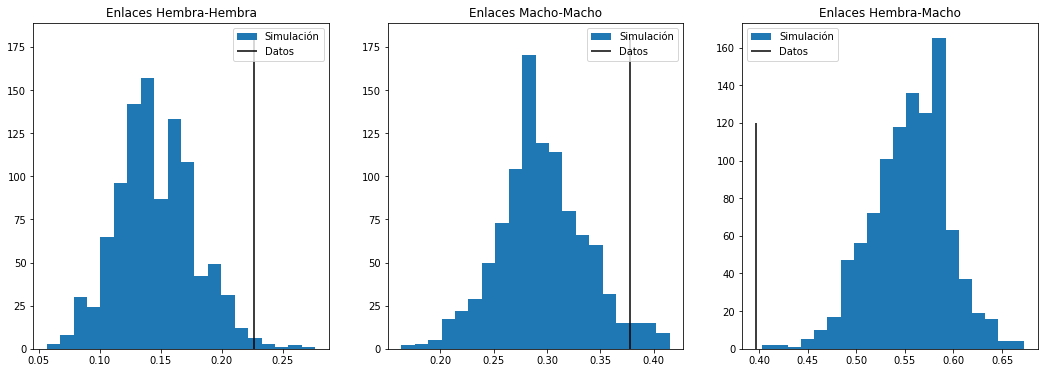

In [ ]:
#Comparemos la red con los datos reales vs las simulaciones
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

ax1.hist(hembras_aux/len(lista), bins=20, label='Simulación')
ax1.vlines(cuenta_hembras/len(lista),0,180, label='Datos')
ax1.set_title('Enlaces Hembra-Hembra')
ax1.legend()
ax2.hist(machos_aux/len(lista), bins=20, label='Simulación')
ax2.vlines(cuenta_machos/len(lista),0,180, label='Datos')
ax2.set_title('Enlaces Macho-Macho')
ax2.legend()
ax3.hist(no_aux/len(lista), bins=20, label='Simulación')
ax3.vlines(cuenta_no/len(lista),0,120, label='Datos')
ax3.set_title('Enlaces Hembra-Macho')
ax3.legend()
plt.show()

  Se ve con claridad cómo el valor calculado en los datos no es usual a lo esperado si aleatorizamos el genero de los delfines. Se ve claramente como el valor de enlaces Hembra-Hembra y Macho-Macho esta a la derecha de lo esperado y el de entre distintos géneros a la izquierda.

 Podemos concluir que existe homofilia en la variable género, ya que al comparar los datos hay mas enlaces H-H o M-M sobre los esperados si la variable género fuera aleatoria. 

#iii. Estime la significancia estadística (p-valor) del valor observado en el caso de la red real.

In [ ]:
#Calculemos el p-value
#Nuestra hipótesis nula es que los enlaces macho-hembra estan en la media de la distribucion.
#Elegimos un nivel de confianza del 99%; es decir, rechazaremos la hipótesis nula a favor de la alternativa si el p-valor es menor a 0.01.
from scipy import stats
t, pv=stats.ttest_1samp(no_aux, popmean=cuenta_no)
print('p value=',pv)

p value= 0.0


El p valor nos da nulo, lo que es un poco problematico. Hablando tecnicamente lo que podemos reportar es una cota para el p-valor, como sampleamos 1000 veces, podemos decir que en ninguna de las 1000 veces obtuvimos una homofilia mayor a la real, y que entonces p-valor < 1/1000. 


Por las dudas veamos que efectivamente, en ninguno de los 1000 sampleos encuentro la misma cantidad de enlaces Hembra-Macho que los obtenidos realmente.

In [ ]:
a=np.where(no_aux == cuenta_no)
print(a[0])

[]


Efectivamente, nos da vacio.
